In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [5]:
dataset = pd.read_csv('C:\\Users\\Qing Chen\\Desktop\\dataset\\Social_Network_Ads.csv')
dataset.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [4]:
X =dataset.iloc[:,[2,3]].values
y= dataset.iloc[:,4].values

In [6]:
# split
from sklearn.cross_validation import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.25,random_state = 0)

C:\Users\Qing Chen\Anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [8]:
# feature scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

C:\Users\Qing Chen\Anaconda3\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


## fitting K-NN to Training set

In [11]:
from sklearn.neighbors import KNeighborsClassifier
cls = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p =2)
cls.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')

## predicting the test result

In [12]:
y_pred = cls.predict(X_test)

## evlauation 

In [13]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test,y_pred)
cm

array([[64,  4],
       [ 3, 29]], dtype=int64)

## visualising

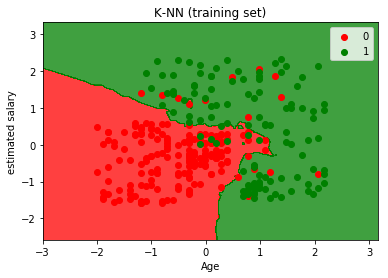

In [16]:
from matplotlib.colors import ListedColormap
X_set = X_train
y_set = y_train
x1,x2 = np.meshgrid(np.arange(start = X_set[:,0].min()-1, stop = X_set[:,0].max()+1,step = 0.01),
                   (np.arange(start = X_set[:,1].min()-1, stop = X_set[:,1].max()+1,step = 0.01)))

                    
plt.contourf(x1,x2,cls.predict(np.array([x1.ravel(),x2.ravel()]).T).reshape(x1.shape),
alpha = 0.75, cmap = ListedColormap(('red','green')))

plt.xlim(x1.min(),x1.max())
plt.ylim(x2.min(),x2.max())

for i,j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j,0],X_set[y_set == j,1],
               c = ListedColormap(('red','green'))(i), label= j)
    
plt.title('K-NN (training set)')
plt.xlabel('Age')
plt.ylabel('estimated salary')
plt.legend()
plt.show()

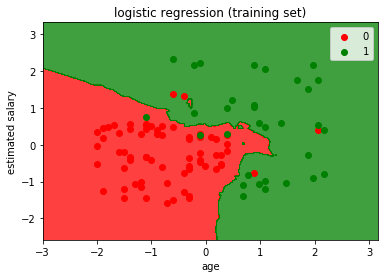

In [17]:
# test data visul
X_set = X_test
y_set = y_test
x1,x2 = np.meshgrid(np.arange(start = X_set[:,0].min()-1, stop = X_set[:,0].max()+1,step = 0.01),
                   (np.arange(start = X_set[:,1].min()-1, stop = X_set[:,1].max()+1,step = 0.01)))

                    
plt.contourf(x1,x2,cls.predict(np.array([x1.ravel(),x2.ravel()]).T).reshape(x1.shape),
alpha = 0.75, cmap = ListedColormap(('red','green')))

plt.xlim(x1.min(),x1.max())
plt.ylim(x2.min(),x2.max())

for i,j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j,0],X_set[y_set == j,1],
               c = ListedColormap(('red','green'))(i), label= j)
    
plt.title('logistic regression (training set)')
plt.xlabel('age')
plt.ylabel('estimated salary')
plt.legend()
plt.show()